# NAME : AKSHAY KAMATE
# BATCH : DSAUS03


# E-Commerce – EDA – Python Project 2

## Context of Data
###  Company - UK-based and registered non-store online retail
###  Products for selling - Mainly all-occasion gifts
###  Customers - Most are wholesalers (local or international)
###  Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('Ecommerce - UK Retailer.csv',encoding='unicode_escape')

In [4]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
data.isnull().sum().sort_values(ascending=False)# check missing values for each column 

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [7]:
data[data.isnull().any(axis=1)].head()
# check out the rows with missing values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [8]:
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')
# change the invoice_date format - String to Timestamp format

In [9]:
data['Description'] = data.Description.str.lower()
# change description - UPPER case to LOWER case

In [10]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
data = data[data.Quantity > 0]#removing negitive values

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [13]:
data.isnull().sum().sort_values(ascending=False)# check missing values for each column 

CustomerID     133361
Description       592
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [14]:
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')
# change the invoice_date format - String to Timestamp format

In [15]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
data = data.dropna()
# data_new without missing values

In [17]:
data.isnull().sum().sort_values(ascending=False)
# check missing values for each column 

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [18]:
data['CustomerID'] = data['CustomerID'].astype('int64')
#change columns type - String to Int type 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [20]:
data[['StockCode','Quantity','UnitPrice','CustomerID']].describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## Add the columns - Month, Day and Hour for the invoice

In [21]:
data["invoice_year"]=data['InvoiceDate'].dt.year
data["invoice_month"]=data['InvoiceDate'].dt.month
data["invoice_day"]=data['InvoiceDate'].dt.day
data["invoice_hour"]=data['InvoiceDate'].dt.hour
data["invoice_min"]=data['InvoiceDate'].dt.minute


In [22]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_year,invoice_month,invoice_day,invoice_hour,invoice_min
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8,26
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8,26
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26


# Problem Statements:
## 1. Perform Basic EDA
### a. Boxplot – All Numeric Variables

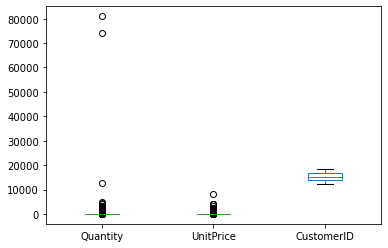

In [23]:
data[['StockCode','Quantity','UnitPrice','CustomerID']].plot.box()

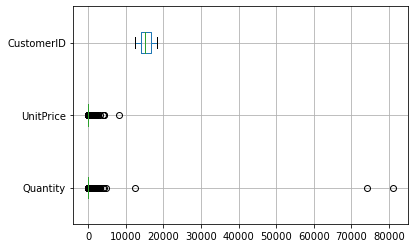

In [24]:
data[['StockCode','Quantity','UnitPrice','CustomerID']].plot.box(vert=False, grid=True)

## Histogram – All Numeric Variables

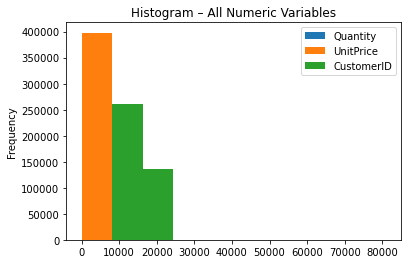

In [24]:
data[['StockCode','Quantity','UnitPrice','CustomerID']].plot.hist(title='Histogram – All Numeric Variables')

## c. Distribution Plot – All Numeric Variables

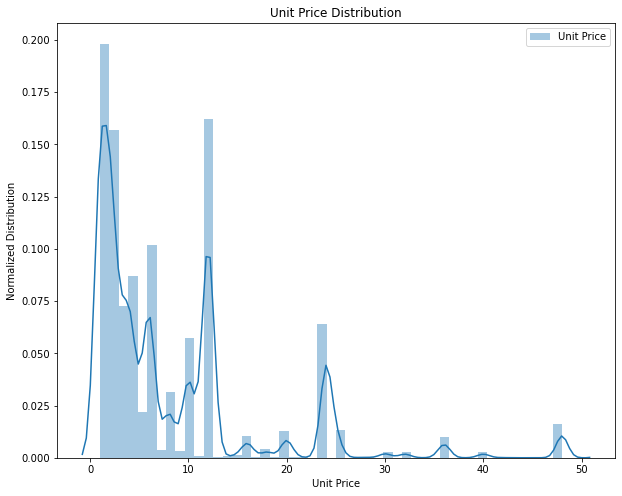

In [25]:
plt.subplots(figsize=(10,8))
sns.distplot(data.Quantity[data.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Normalized Distribution')
plt.title('Unit Price Distribution')
plt.show()

## d. Aggregation for all numerical Columns

In [26]:

#sum groupby StockCode
df_quant_sold = data[['StockCode','Quantity']].groupby('StockCode').sum()
df_quant_sold.reset_index(inplace = True)
#order descending
df_quant_sold.sort_values(by = ['Quantity'], ascending = False, inplace = True)
df_quant_sold.head()

,StockCode,Quantity
2399,23843,80995
1997,23166,77916
2804,84077,54415
1088,22197,49183
3219,85099B,46181


## e. Unique Values across all columns

In [27]:
uniqueValues = data.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
InvoiceNo        18536
StockCode         3665
Description       3877
Quantity           302
InvoiceDate      17286
UnitPrice          441
CustomerID        4339
Country             37
invoice_year         2
invoice_month       12
invoice_day         31
invoice_hour        15
invoice_min         60
dtype: int64


## f. Duplicate values across all columns

In [28]:
data.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 397924, dtype: bool

## g. Correlation – Heatmap - All Numeric Variables

In [29]:
corr = data[['Quantity','UnitPrice','CustomerID',]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Quantity,UnitPrice,CustomerID
Quantity,1.00,-0.00,-0.01
UnitPrice,-0.00,1.00,-0.01
CustomerID,-0.01,-0.01,1.00


In [30]:
data.corr() # correlation matrix

,Quantity,UnitPrice,CustomerID,invoice_year,invoice_month,invoice_day,invoice_hour,invoice_min
Quantity,1.000000,-0.004561,-0.006411,0.001595,-0.004006,-0.000884,-0.014532,-0.003095
UnitPrice,-0.004561,1.000000,-0.010863,-0.000191,-0.005171,-0.001277,-0.000286,-0.000541
CustomerID,-0.006411,-0.010863,1.000000,-0.036352,0.030417,-0.002491,0.065852,-0.026865
invoice_year,0.001595,-0.000191,-0.036352,1.000000,-0.340655,0.169515,-0.019763,0.000424
invoice_month,-0.004006,-0.005171,0.030417,-0.340655,1.000000,-0.118007,0.058213,0.008339
invoice_day,-0.000884,-0.001277,-0.002491,0.169515,-0.118007,1.000000,0.009275,-0.027760
invoice_hour,-0.014532,-0.000286,0.065852,-0.019763,0.058213,0.009275,1.000000,-0.122545
invoice_min,-0.003095,-0.000541,-0.026865,0.000424,0.008339,-0.027760,-0.122545,1.000000


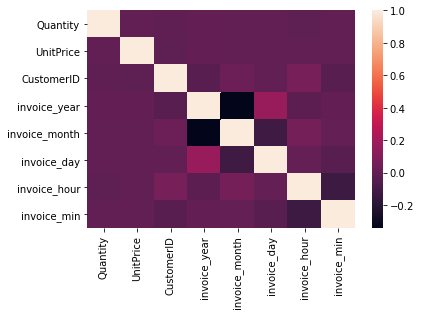

In [31]:
sns.heatmap( data.corr()  );

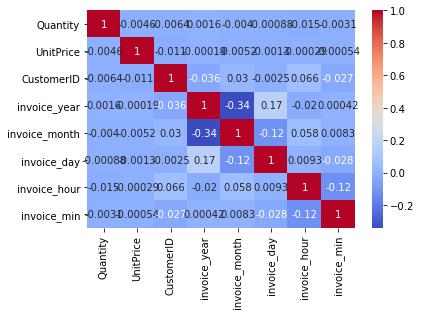

In [32]:
sns.heatmap( data.corr() , cmap='coolwarm' , annot=True );

## h. Regression Plot - All Numeric Variables

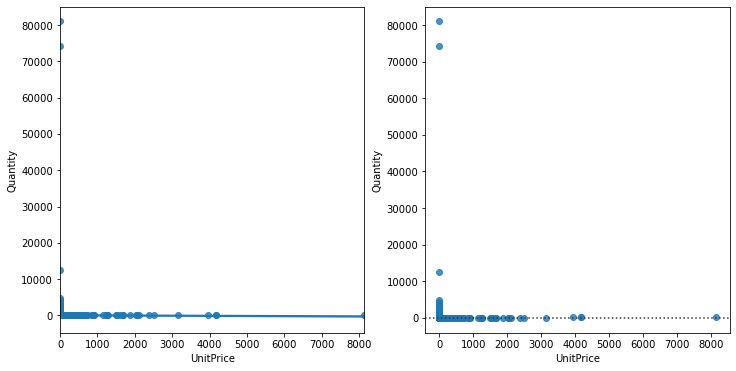

In [34]:
fig, [ax0,ax1] = plt.subplots(1,2)
fig.set_size_inches([12,6])
sns.regplot(data=data,x='UnitPrice',y='Quantity',ax=ax0)
sns.residplot(data=data,x='UnitPrice',y='Quantity',ax=ax1)
plt.show()

## i. Bar Plot – Every Categorical Variable vs every Numerical Variable

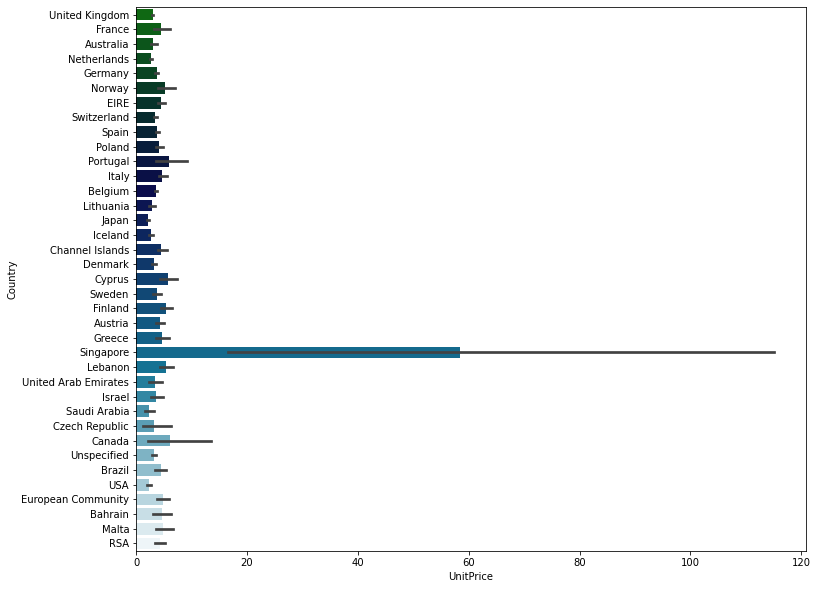

In [35]:
#unitprice vs country
plt.figure(figsize=(12,10))
sns.barplot(x = 'UnitPrice',y = 'Country',data = data,palette='ocean')
plt.show()

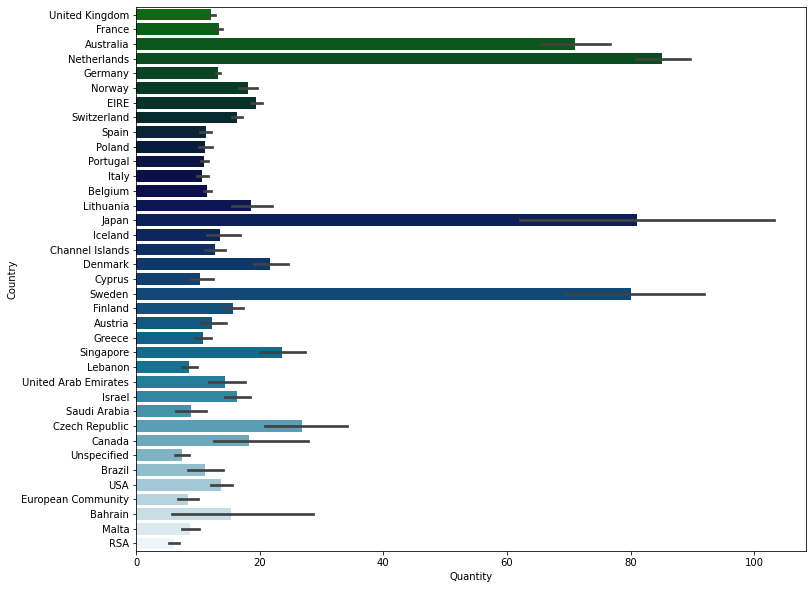

In [36]:
#amount spent vs country
plt.figure(figsize=(12,10))
sns.barplot(x = 'Quantity',y = 'Country',data = data,palette='ocean')
plt.show()

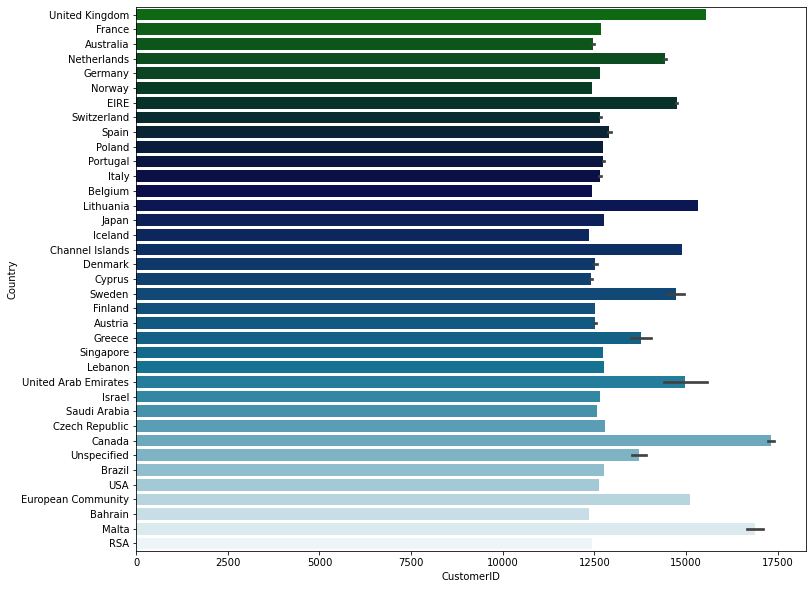

In [37]:
#quantity vs country
plt.figure(figsize=(12,10))
sns.barplot(x = 'CustomerID',y ='Country',data = data,palette='ocean')
plt.show()

## j. Pair plot - All Numeric Variables

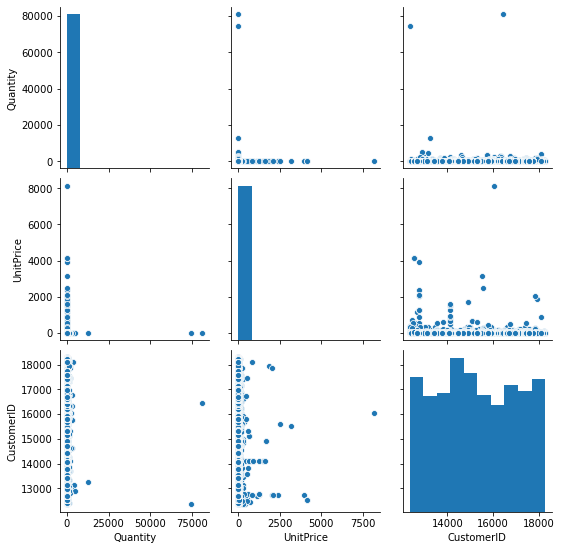

In [38]:
sns.pairplot(data, vars = ['Quantity', 'UnitPrice','CustomerID' ])

## k. Line chart to show the trend of data - All Numeric/Date Variables

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_year,invoice_month,invoice_day,invoice_hour,invoice_min
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8,26
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8,26
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26


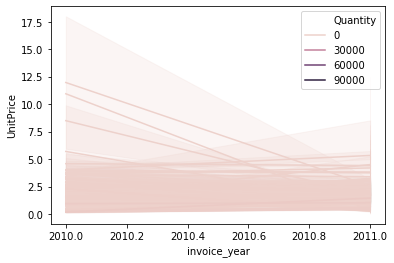

In [26]:
sns.lineplot(y = "UnitPrice", x = "invoice_year", data=data, hue="Quantity")
plt.show()

## l. Plot the skewness - All Numeric Variables

In [5]:
data.skew(axis = 0, skipna = True)

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64